In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a,b,n)

(array([100089., 100363.,  99478.,  99532.,  99603., 100319.,  99998.,
         99824.,  99887., 100907.]),
 array([ 1.00029123, 10.90024187, 20.80019251, 30.70014315, 40.60009379,
        50.50004443, 60.39999507, 70.29994571, 80.19989635, 90.09984699,
        99.99979763]),
 <a list of 10 Patch objects>)

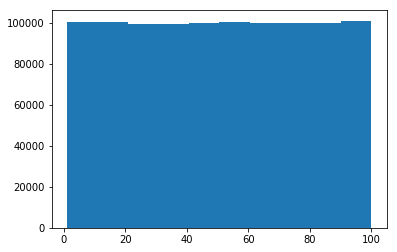

In [13]:
%matplotlib inline
plt.hist(data)

## Distribucion normal

In [19]:
data = np.random.randn(100000)

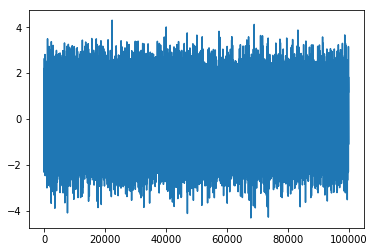

In [21]:
x = range(1,100001)
plt.plot(x, data)

(array([3.4000e+01, 4.3200e+02, 3.6430e+03, 1.5124e+04, 3.0514e+04,
        3.0805e+04, 1.5243e+04, 3.7120e+03, 4.6700e+02, 2.6000e+01]),
 array([-4.31094249e+00, -3.44922078e+00, -2.58749908e+00, -1.72577737e+00,
        -8.64055670e-01, -2.33396472e-03,  8.59387740e-01,  1.72110945e+00,
         2.58283115e+00,  3.44455286e+00,  4.30627456e+00]),
 <a list of 10 Patch objects>)

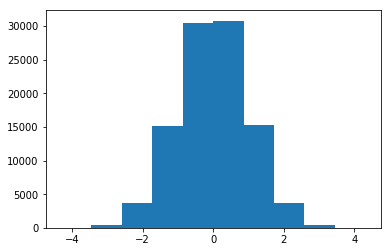

In [22]:
plt.hist(data)

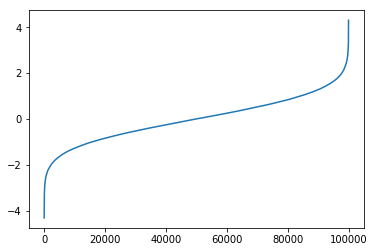

In [23]:
plt.plot(x, sorted(data))

(array([1.700e+01, 1.520e+02, 7.450e+02, 2.089e+03, 3.046e+03, 2.458e+03,
        1.190e+03, 2.620e+02, 3.800e+01, 3.000e+00]),
 array([-3.73385023, -1.75732788,  0.21919448,  2.19571684,  4.1722392 ,
         6.14876156,  8.12528391, 10.10180627, 12.07832863, 14.05485099,
        16.03137335]),
 <a list of 10 Patch objects>)

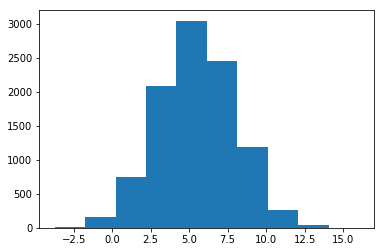

In [24]:
mu = 5.5
sd = 2.5
data = mu + sd * np.random.randn(10000) # Z = (X - mu) / sd -> N(0,1)
plt.hist(data)

In [25]:
data = np.random.randn(2,4)
data

array([[-0.04084472,  1.55721334, -0.65349223,  1.67293962],
       [ 0.59277693,  0.00541213, -0.76435377,  0.66200348]])

## Simulacion de Monte-Carlo 

* Generar numeros aleatorios entre 0 y 1
* Calcular x*x + y*y
    * Si el valor es inferior a 1 -> estamos dentro del circulo
    * Si el valor es superior a 1 -> estamos fuera del circulo
* Calculamos el valor total de veces que estan dentro del circulo y lo dividimos entre el numero total de intentos para obtener una aproximacion de la probabilidad de caer dentro del circulo
* Usamos dicha probabilidad para aproximar el valor a pi
* Repetimos el experimento un numero suficiente de veces, para obtener diferentes aproximaciones de pi
* Calculamos el promedio de los 1000 experimentos anteriores para dar el valor final de pi

In [40]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z <= 1:
                value += 1
        float_value = float(value)
        pi_value = (float_value * 4) / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg / n_exp
    print(pi)
    fig = plt.plot(pi_value_list)
    return(pi, fig)

3.1440640000000015


(3.1440640000000015, [<matplotlib.lines.Line2D at 0x7f082fee39e8>])

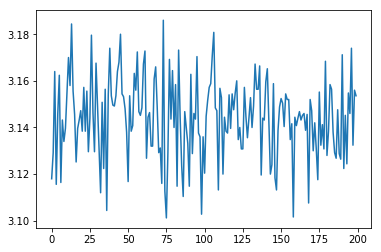

In [41]:
pi_montecarlo(10000,200)

## Dummy datasets

In [47]:
n = 100000
data = pd.DataFrame(
    {
        'A': np.random.randn(n),
        'B': 1.5 + 2.5 * np.random.randn(n),
        'C': np.random.uniform(5,32,n)
    }
)

In [48]:
data.describe()

,A,B,C
count,100000.000000,100000.000000,100000.000000
mean,0.002265,1.490404,18.526640
std,0.998195,2.491768,7.803677
min,-4.172133,-8.972950,5.000433
25%,-0.666971,-0.186064,11.767471
50%,0.002986,1.490374,18.585722
75%,0.677678,3.171598,25.288529
max,4.512701,12.000061,31.999417
